In [ ]:
'''
train: /path/to/train/images
val: /path/to/val/images

nc: 2  # number of classes
names: ['class1', 'class2']  # class names
'''

In [1]:
'''
git clone https://github.com/ultralytics/yolov5.git
cd yolov5
pip install -r requirements.txt
'''

'\ngit clone https://github.com/ultralytics/yolov5.git\ncd yolov5\npip install -r requirements.txt\n'

In [ ]:
import torch

# Set the path to your dataset YAML file
dataset_yaml = '/path/to/custom_dataset.yaml'

# Model selection: You can choose yolov5s, yolov5m, yolov5l, or yolov5x depending on your needs
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Start training (fine-tuning)
model.train(
    data=dataset_yaml,       # Path to the dataset YAML file
    epochs=50,               # Number of epochs to train
    batch_size=16,           # Batch size
    img_size=640,            # Image size for training
    device=0,                # Device to train on (0: GPU, 'cpu' for CPU)
    project='runs/train',    # Save location
    name='exp_custom',       # Experiment name
    exist_ok=False,          # Whether to overwrite existing runs
    workers=4                # Number of data loader workers
)

# Validate after training (optional)
model.val(data=dataset_yaml)  # Evaluate the model performance on validation data


Using cache found in /Users/yonglxie/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-3-9 Python-3.9.6 torch-2.6.0 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 17.9MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/Users/yonglxie/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


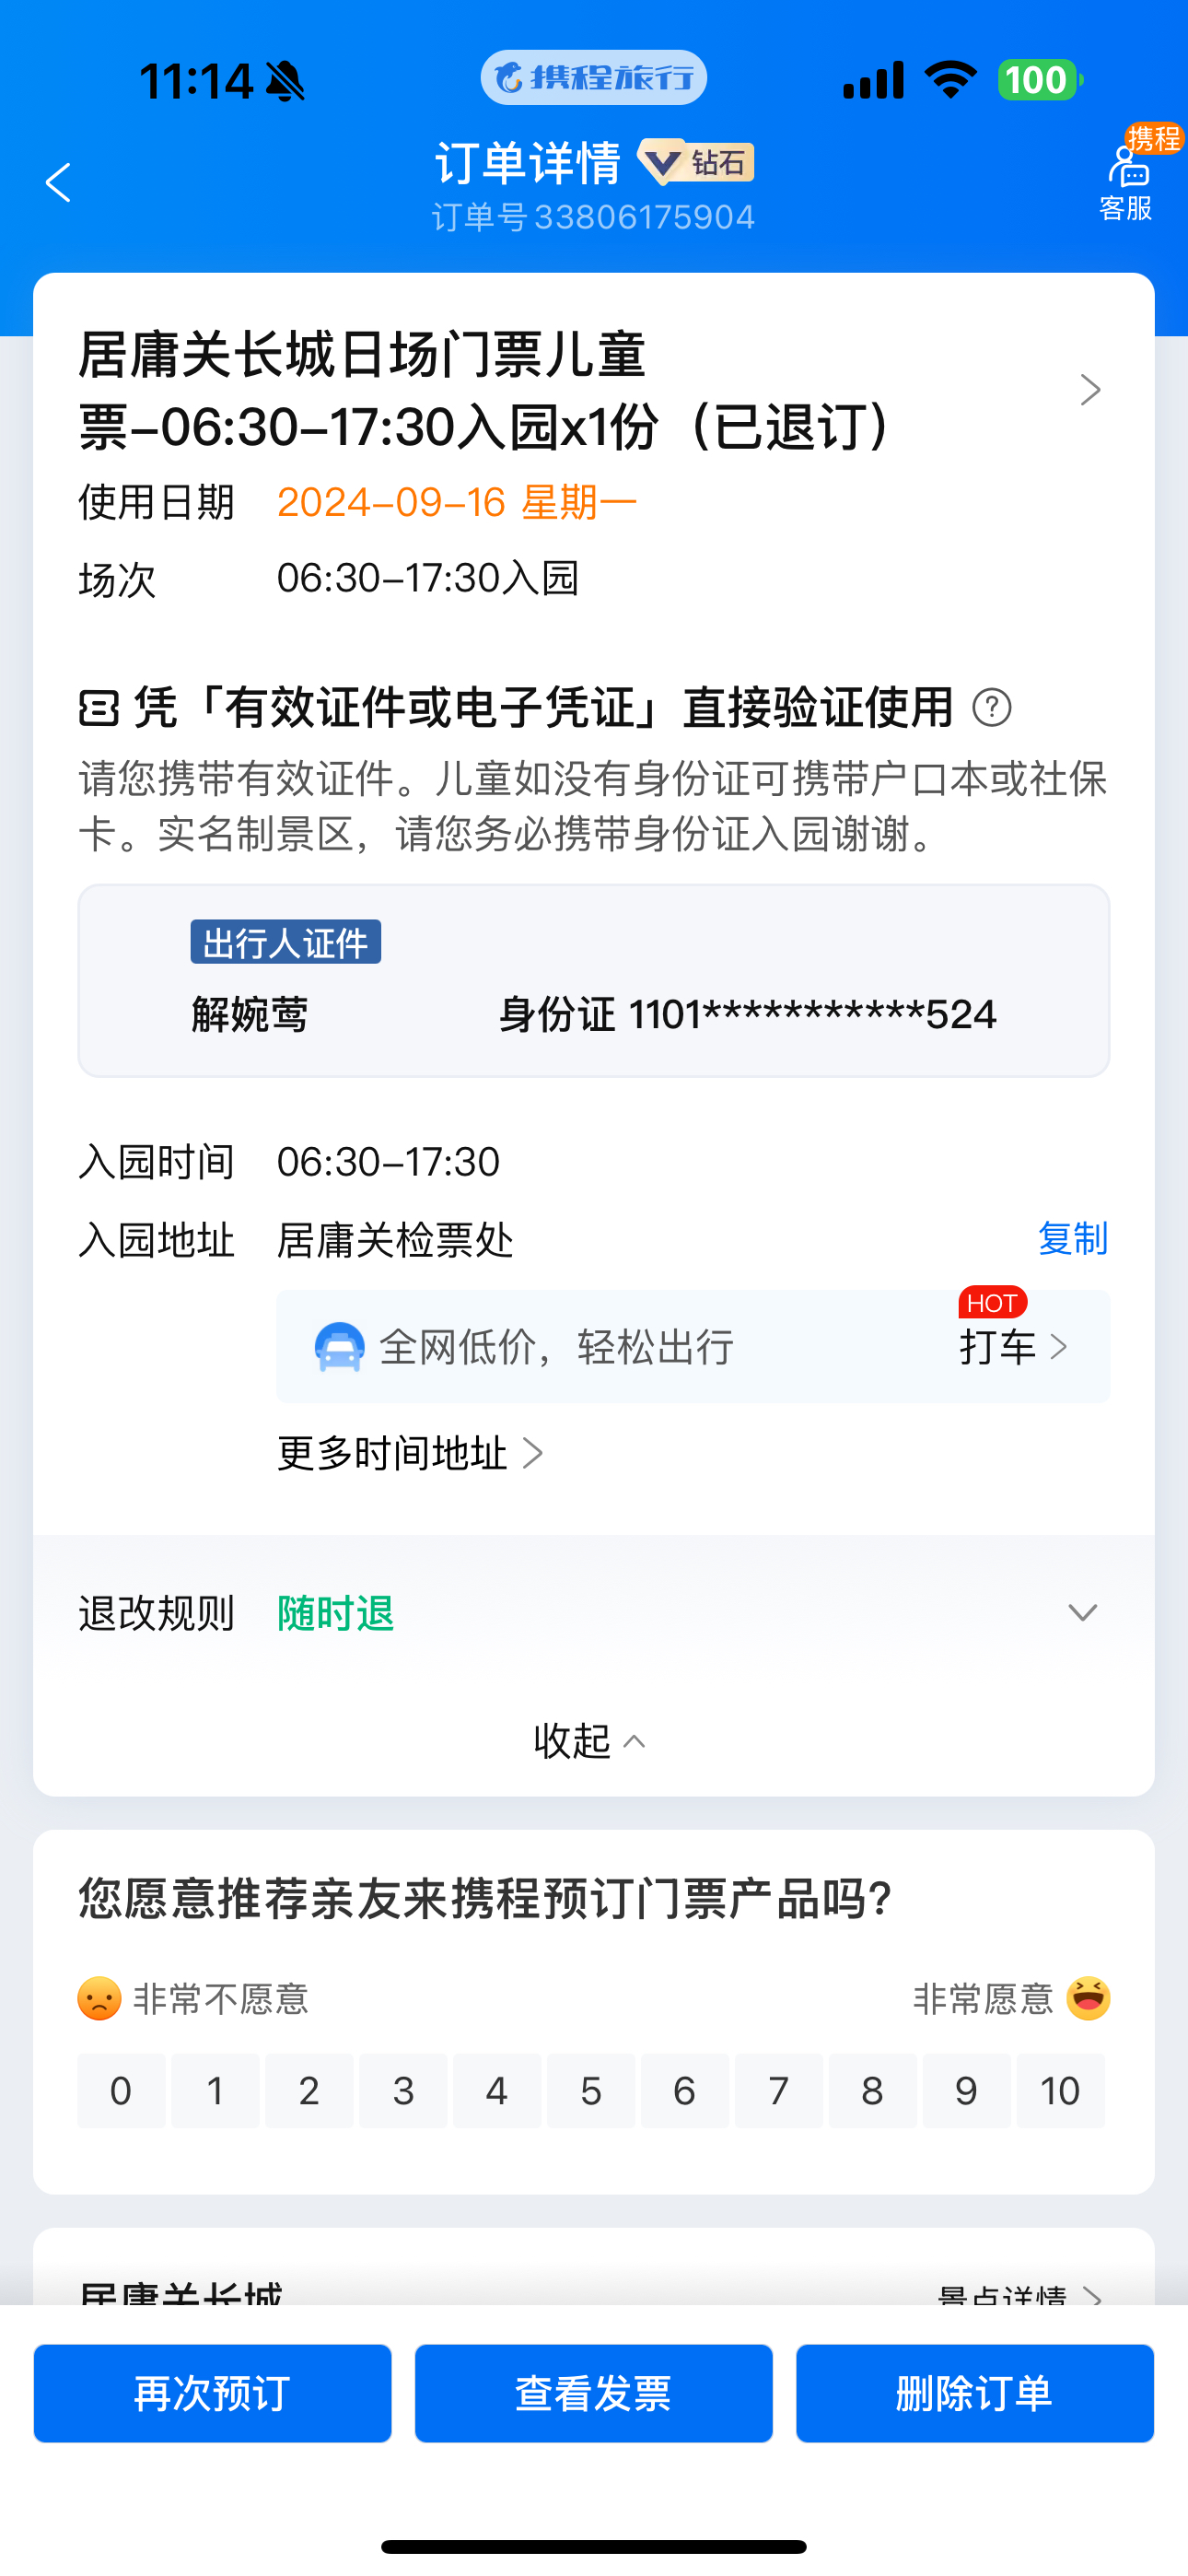

Empty DataFrame
Columns: [xmin, ymin, xmax, ymax, confidence, class, name]
Index: []


In [7]:
import torch
# Load the best model after training
#model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/exp_custom/weights/best.pt')
model = torch.hub.load('ultralytics/yolov5', model='yolov5s')

# Run inference on an image
results = model('/Users/yonglxie/Downloads/image-1.jpg')

# Show results
results.show()

# Print results
print(results.pandas().xyxy[0])  # Get bounding box predictions in a pandas DataFrame
